# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


### Importing Project rquired packages/dependencies

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [83]:
#create dataframe
a_ds = pd.read_csv("avocado.csv")

In [84]:
#checking top five rows

a_ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [85]:
#checking last five rows
a_ds.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [86]:
a_ds.sample(n=5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
5451,43,2016-02-28,0.82,569349.05,248401.81,134264.79,46.83,186635.62,67866.87,118768.75,0.00,conventional,2016,Tampa
9400,14,2015-09-20,1.56,3291.61,33.31,127.31,0.00,3130.99,3130.99,0.00,0.00,organic,2015,BuffaloRochester
2954,42,2016-03-06,1.21,819706.70,62539.58,541218.77,21461.02,194487.33,191744.58,2742.75,0.00,conventional,2016,BaltimoreWashington
7675,45,2017-02-19,1.18,241012.17,68120.76,90486.17,3142.36,79262.88,78087.14,1175.74,0.00,conventional,2017,RichmondNorfolk
7543,19,2017-08-20,1.32,671617.66,191682.01,131531.25,15625.26,332779.14,276359.88,55932.31,486.95,conventional,2017,Portland


In [87]:
a_ds.sample(axis = 0)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11778,0,2015-12-27,1.52,549787.59,89709.92,206198.62,5836.04,248043.01,142262.93,105780.08,0.0,organic,2015,TotalUS


In [88]:
#checking shape & datatypes of the columns in data...
print(a_ds.shape)
print(' ')
print(a_ds.dtypes)

(18249, 14)
 
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


In [89]:
a_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Observation:
the data set has 18249 rows of data & 14 Columns

The first Column is Unnamed.. No mention of this column in Problem description so its irrelevant We will drop it.

In [90]:
a_ds.drop('Unnamed: 0', axis=1, inplace=True)

In [91]:
#Checking for duplicate entries
a_ds.duplicated().sum()

0

In [92]:
# checking the shape of the dataset and columns in it
print(a_ds.shape)
print(a_ds.columns)

(18249, 13)
Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')


In [93]:
#Checking for descriptive statistics

a_ds.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [94]:
#total missing values
a_ds.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Observations:
Dataset has no missing/null value.

In [95]:
#counting total vaues of 0/zero entries in data...
a_ds[a_ds==0].count()

Date                0
AveragePrice        0
Total Volume        0
4046              242
4225               61
4770             5497
Total Bags         15
Small Bags        159
Large Bags       2370
XLarge Bags     12048
type                0
year                0
region              0
dtype: int64

### Observation:
4046,4225,4770,Total Bags,Small Bags,Large Bags and XLarge Bags feature having entry as zero. we will look into it in later stage.

In [96]:
# creating deep copy 
avocado_ds_work_file = a_ds.copy()

In [97]:
# calling the function
missing_val(avocado_ds_work_file)
print("\n")
print("Percentage of missing data:\n",avocado_ds_work_file.isnull().sum()/len(avocado_ds_work_file)*100)

{} 

Percentage of missing data:
 Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64


### we have date column also in dataset and its datatype is objects, lets change into datetime format

In [98]:

avocado_ds_work_file["Date"] = pd.to_datetime(avocado_ds_work_file["Date"])
avocado_ds_work_file.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [99]:
# updating original files
a_ds = avocado_ds_work_file.copy()

In [100]:
a_ds.describe().round(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.00000,18249.00000
mean,1.40598,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.42651,2016.14790
std,0.40268,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.89465,0.93994
min,0.44000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,2015.00000
25%,1.10000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.00000,2015.00000
50%,1.37000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.00000,2016.00000
75%,1.66000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.50000,2017.00000
max,3.25000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.65000,2018.00000


### Observation:
    By dignosing the data point, i have found that small and large bags are bifurcation of total bags so we can keep only total bags instead of them.we will treat them in coming section

In [101]:
a_ds.select_dtypes(include="object").describe()# describing the objects data types

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


### Observation:
    From this we can understand that all Avocado belongs to one category which is conventional and dataset has maximum data from Albany state


# EDA

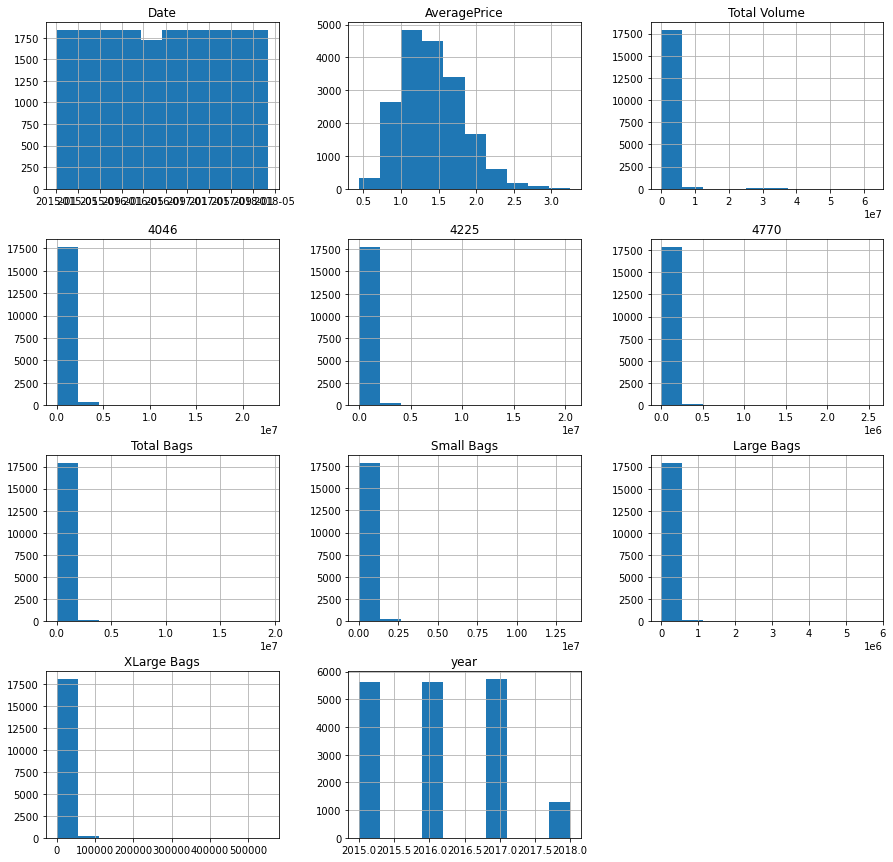

In [102]:
# checking the distribution of the numeric features
a_ds.select_dtypes(exclude="object").hist(figsize= (15,15)); 

### Observation:
    from total volume to XLage bags' features are right skewed. lets check the skewness of the data and after that we will do some analysis. so for checking the skewness we will take numeric data into another variable but before that we need to change the name of the 3 columsn which are written in number so that we can take them as features

In [103]:
a_ds.rename(columns={"4046":"PLU_4046","4225":"PLU_4225","4770":"PLU_4770"},inplace=True)
a_ds.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [104]:
# saving numeric data into a variable for nmeric operation
num_data = a_ds[["Total Volume",	"PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]]

In [105]:
# checking the skewness
num_data.skew()

Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

### Observation:
all the columns are skewed one as we have seen in the histogram. we will treat them after EDA.

i am creating a deep copy of the data and adding some more feature in the dataset for the analysis purpose from datetime columns.


i have observed that date format is not same from top to tail, so changing it in a proper manner. DD-MM-YYYY

In [106]:
# creating a copy for further analysis
avocado_ds_analysis_data = a_ds.copy() 

In [107]:
avocado_ds_analysis_data["Date"] = pd.to_datetime(avocado_ds_analysis_data["Date"],format = "%d/%m/%Y") 


In [108]:
avocado_ds_analysis_data.dtypes


Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
PLU_4046               float64
PLU_4225               float64
PLU_4770               float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Date format has been changed for entire column and it has seme for all observation



In [109]:
avocado_ds_analysis_data["Day"] =  avocado_ds_analysis_data["Date"].dt.day
avocado_ds_analysis_data["year"] =  avocado_ds_analysis_data["Date"].dt.year
avocado_ds_analysis_data["Month"] =  avocado_ds_analysis_data["Date"].dt.month
avocado_ds_analysis_data["week"] =  avocado_ds_analysis_data["Date"].dt.week

In [110]:
avocado_ds_analysis_data.head()


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,week
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,52
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,51
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,50
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,49
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,48


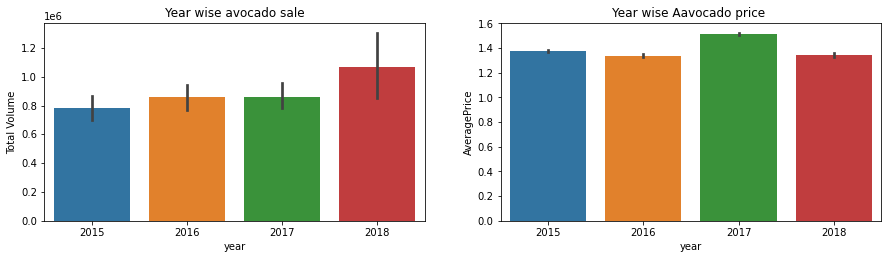

In [111]:
plt.figure(figsize=(15,8))
plt.subplot(221)
sns.barplot(x = "year", y = "Total Volume", data = avocado_ds_analysis_data)
plt.title("Year wise avocado sale");

plt.subplot(222)
sns.barplot(x = "year", y = "AveragePrice", data = avocado_ds_analysis_data)
plt.title("Year wise Aavocado price ");

Avocado number of sold in the year of 2018 is more as compared to ramining year but when we compare the year wise avocado price, 2017 year wise price average is high for as compared to remaining year and it can be

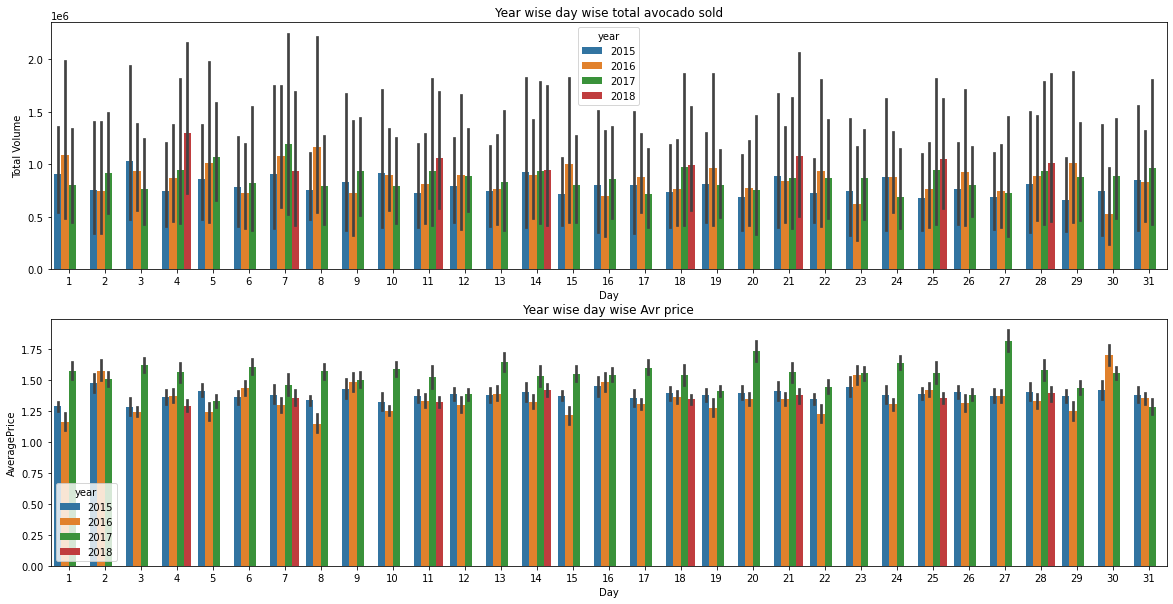

In [112]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Day", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise total avocado sold");

plt.subplot(212)
sns.barplot(x = "Day", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Year wise day wise Avr price");

out of 31 days, 13 days ,total sold count was higher in 2017 .

in 2017 on 20th and 27th , the avg price were high and in 2016 on 30th ,the avg price was high

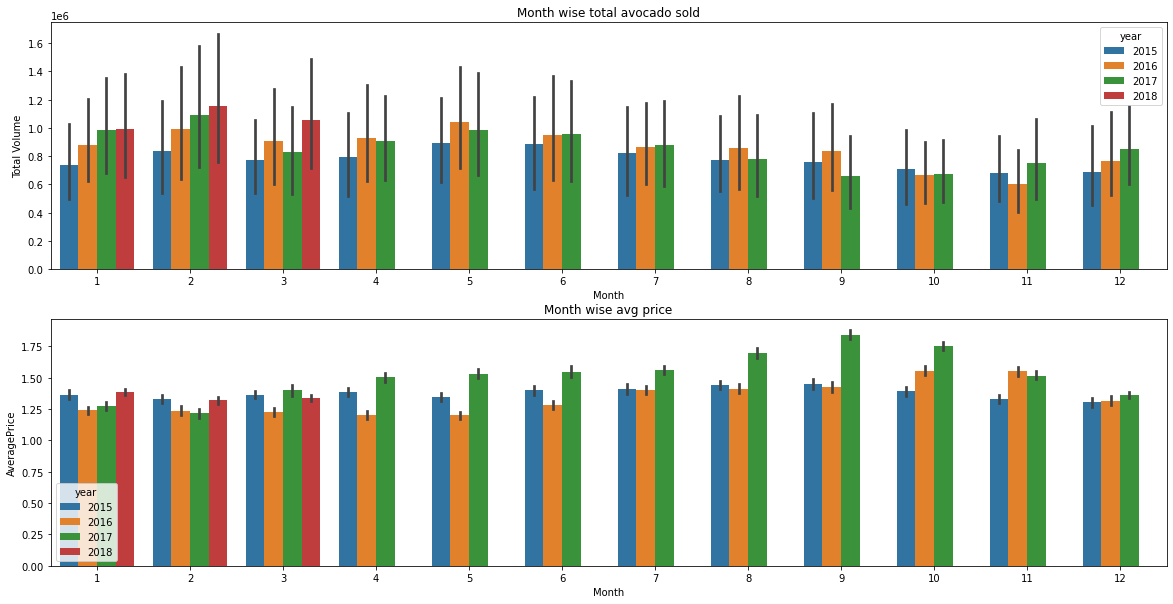

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "Month", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "Month", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("Month wise avg price");

Text(0.5, 1.0, 'week wise avg price')

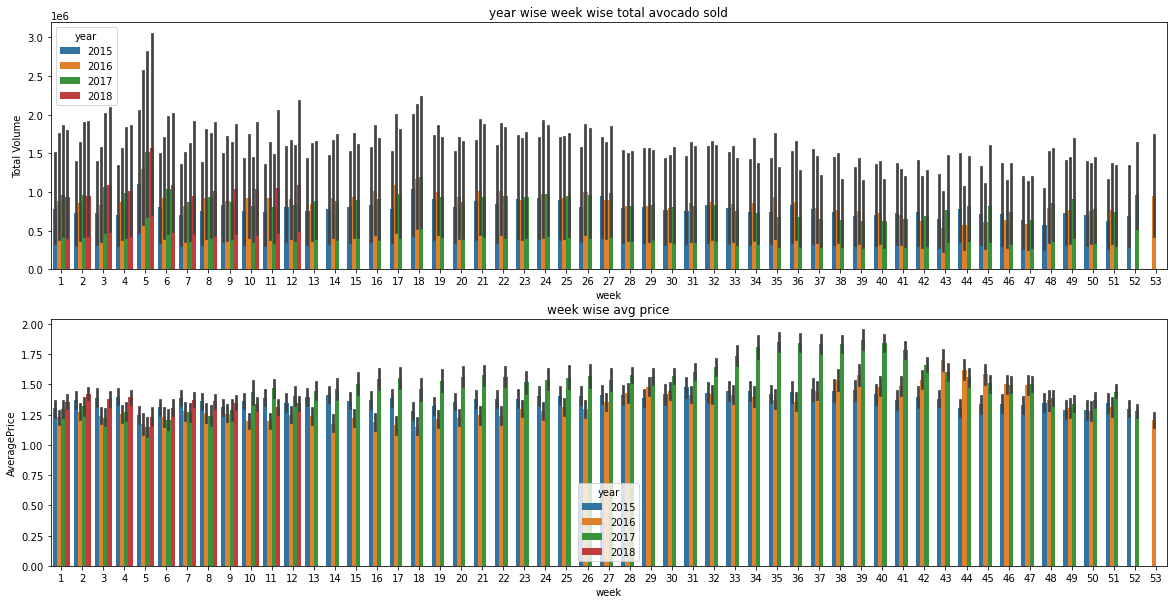

In [114]:
plt.figure(figsize=(20,10))
plt.subplot(211)
sns.barplot(x = "week", y = "Total Volume", data = avocado_ds_analysis_data,hue="year")
plt.title("year wise week wise total avocado sold")

plt.subplot(212)
sns.barplot(x = "week", y = "AveragePrice", data = avocado_ds_analysis_data,hue="year")
plt.title("week wise avg price")

In [115]:
a_ds.groupby("region")[["Total Volume","AveragePrice"]].mean().sort_values(by ="Total Volume" ,ascending = False)


,Total Volume,AveragePrice
region,,
TotalUS,1.735130e+07,1.319024
West,3.215323e+06,1.272219
California,3.044324e+06,1.395325
SouthCentral,2.991952e+06,1.101243
Northeast,2.110299e+06,1.601923
Southeast,1.820232e+06,1.398018
GreatLakes,1.744505e+06,1.338550
Midsouth,1.503992e+06,1.404763
LosAngeles,1.502653e+06,1.216006


Top 5 region where it has consumed a lot and those are west,California,southcentral,northeast and southeast.



let's check the outlier in the dataset but before do that we will delete some columns whcih just an extent of one column and share the similar observation
Small and large bag are the extension of the total bag thus we are deleteing it.type column has only one value that avocado is conventional type so we can delete it.

In [116]:
a_ds.drop(columns=["Small Bags","Large Bags"],axis = 1, inplace = True)


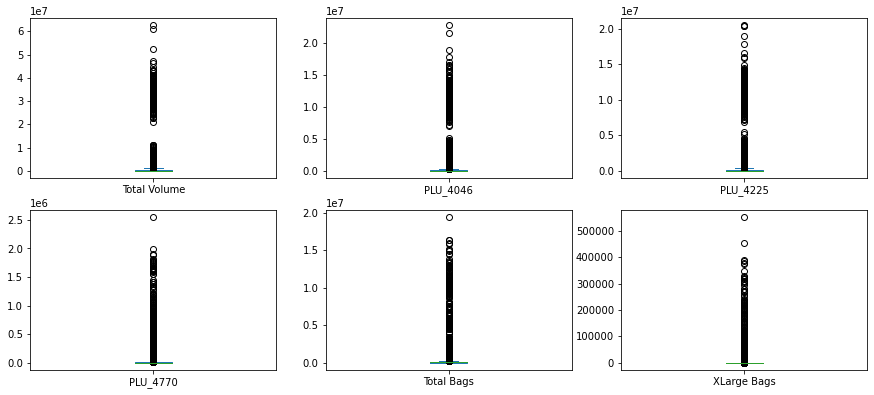

In [117]:
num_data = avocado_ds_analysis_data[["Total Volume","PLU_4046"	,"PLU_4225",	"PLU_4770","Total Bags","XLarge Bags"]]

num_data.plot(kind = "box", subplots = True, layout=(3,3), figsize = (15,10));

### Observation:
All numeric columns are full with outlier let treat them but before doing that we will encode cateorical variables.


# Label Encoding


In [118]:
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

lb = LabelEncoder()
lb.fit(a_ds["region"])

a_ds["region"] = lb.transform(a_ds["region"])

In [119]:
a_ds.head()


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0.0,conventional,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,0.0,conventional,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,0.0,conventional,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0.0,conventional,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,0.0,conventional,2015,0


In [120]:
a_ds.tail(10)


,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,XLarge Bags,type,year,region
18239,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,0.0,organic,2018,53
18240,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,0.0,organic,2018,53
18241,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,0.0,organic,2018,53
18242,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,0.0,organic,2018,53
18243,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,0.0,organic,2018,53
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,0.0,organic,2018,53
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,0.0,organic,2018,53
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,0.0,organic,2018,53
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,0.0,organic,2018,53
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,0.0,organic,2018,53


In [121]:
# Treating the outlier with zscore and delete the date and year columns, i kept it for EDA purpose.
a_ds.drop(columns=["Date","year","type"],axis = 1,inplace = True)

score = np.abs(zscore(a_ds))

new_avocado_ds = a_ds[(score <3).all(axis = 1)]

# how much data lost post outlier treamement

data_loss = len(new_avocado_ds)/len(a_ds)
print(1- data_loss," data we lost after outlier treatment")

0.028001534330648226  data we lost after outlier treatment


we have corrected the outlier using the z score and seen that we have lost 2.8% data approx and it seem ok to lose.

In [122]:
from sklearn.preprocessing import power_transform
select_data =new_avocado_ds[["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"]]

print("before",select_data.skew())
select_data = power_transform(select_data,method='yeo-johnson', standardize=False)
tranform_data = pd.DataFrame(select_data)
print("after",tranform_data.skew())

before PLU_4046       4.628222
PLU_4225       4.262080
PLU_4770       4.919251
XLarge Bags    6.063918
dtype: float64
after 0   -0.037857
1   -0.044224
2    0.022830
3    0.839903
dtype: float64


In [123]:
# checking the name of the columsn becaue after power_transform it get convert into numpy array and index value assigned to columns.
tranform_data.rename(columns = {0:"PT_PLU_4046",1:"PT_PLU_4225",2:"PT_PLU_4770",3:"PT_Xlarge Bags"}, inplace = True)
# joining transformed data 

new_avocado_ds = pd.concat([new_avocado_ds,tranform_data],axis = 1,join = "inner")

# since transformed features are added in the data so we need to deleted original one to avoid duplicacy
new_avocado_ds.drop(columns =["PLU_4046","PLU_4225","PLU_4770","XLarge Bags"],axis =1, inplace =True)

In [124]:
new_avocado_ds.skew()


AveragePrice      0.402183
Total Volume      3.697542
Total Bags        4.479318
region            0.021079
PT_PLU_4046      -0.019568
PT_PLU_4225      -0.035632
PT_PLU_4770       0.030491
PT_Xlarge Bags    0.870667
dtype: float64

In [125]:
new_avocado_ds["Total Volume"] = np.log1p(new_avocado_ds["Total Volume"])
new_avocado_ds["Total Bags"] = np.log1p(new_avocado_ds["Total Bags"])

In [126]:
new_avocado_ds.skew()


AveragePrice      0.402183
Total Volume     -0.068264
Total Bags       -0.372818
region            0.021079
PT_PLU_4046      -0.019568
PT_PLU_4225      -0.035632
PT_PLU_4770       0.030491
PT_Xlarge Bags    0.870667
dtype: float64

we had skewness in a few of the features in the dataset and which has been corrected by using power transform and two columns have been corrected by using log1p because while performing power transform on these two feature these were not getting conveted. Power transform return result in the form of array hence we had to rename the columns name after converting them into pandas data Frame.
We took features serprataly which had high skewness and assigned them in other variable. performed power transform and concat the transformed features into original dataset by using pandas function.

<AxesSubplot:>

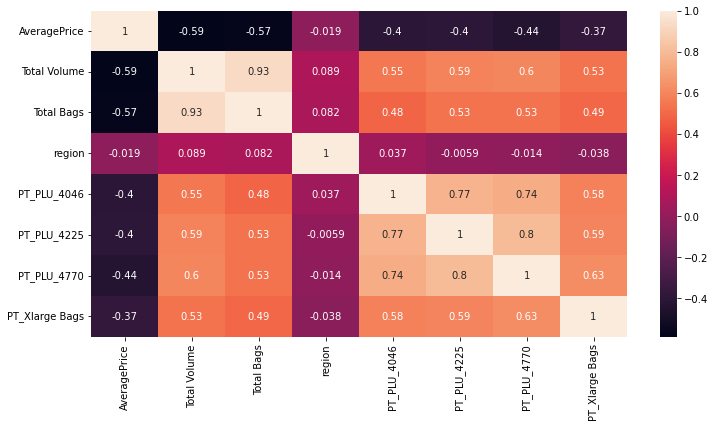

In [127]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

Total Volume and Total bags are highly correlated and we should drop one.

In [128]:
new_avocado_dsX_check = new_avocado_ds.copy()


In [129]:
new_avocado_ds.drop("Total Bags",axis =1, inplace = True)


<AxesSubplot:>

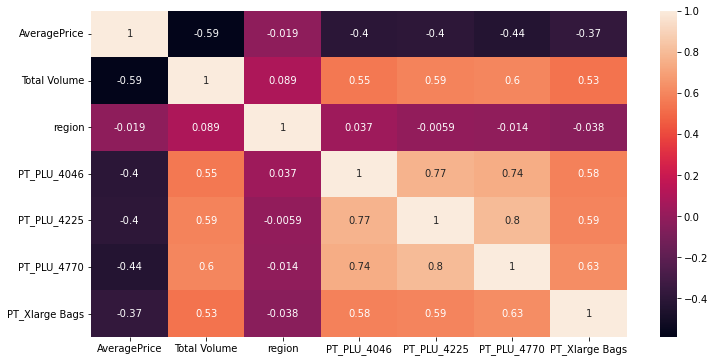

In [130]:
plt.figure(figsize=(12,6))
sns.heatmap(new_avocado_ds.corr(),annot = True)

# Data Modeling

In [134]:
# seprate data into train and test and create model

X = new_avocado_ds.drop("AveragePrice",axis =1)
y =new_avocado_ds["AveragePrice"]

# Applying standard scaler to scale the data point.

sc = StandardScaler()
X = sc.fit_transform(X)


# we will find best random state wit this for loop.
for i in range(50,500,75):
    LR = LinearRegression()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    LR.fit(X_train,y_train)
    print("Training Score",LR.score(X_train,y_train),"Random state",i)
    pred = LR.predict(X_test)
    print("Test Score",LR.score(X_test,y_test))
    print("Mean Squared Error",mean_squared_error(y_test,pred))
    print("R2 Score",r2_score(y_test,pred),"\n")

Training Score 0.3603600789277399 Random state 50
Test Score 0.36175744761978723
Mean Squared Error 0.09789300571189162
R2 Score 0.36175744761978723 

Training Score 0.35696449665586827 Random state 125
Test Score 0.3757026092970026
Mean Squared Error 0.09365963696151894
R2 Score 0.3757026092970026 

Training Score 0.3551452666701044 Random state 200
Test Score 0.3823646110063498
Mean Squared Error 0.09491765092945283
R2 Score 0.3823646110063498 

Training Score 0.3601877664503592 Random state 275
Test Score 0.36266836705641015
Mean Squared Error 0.09621805005387338
R2 Score 0.36266836705641015 

Training Score 0.36438336699173446 Random state 350
Test Score 0.3455119087983668
Mean Squared Error 0.09896125448615331
R2 Score 0.3455119087983668 

Training Score 0.36270719885066116 Random state 425
Test Score 0.3519952955082648
Mean Squared Error 0.09699691835945794
R2 Score 0.3519952955082648 



In [135]:
# testing
for i in range(50,500,50):
    RF = RandomForestRegressor()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =i)
    RF.fit(X_train,y_train)
    print("Training Score",RF.score(X_train,y_train),"Random State",i)
    pred = RF.predict(X_test)
    print("Test Score",RF.score(X_test,y_test))
    print("Mean Squared Error",mean_squared_error(y_test,pred))
    print("R2 Score",r2_score(y_test,pred),"\n")

Training Score 0.9727463949324572 Random State 50
Test Score 0.8127950699828208
Mean Squared Error 0.028713305333720254
R2 Score 0.8127950699828208 

Training Score 0.9736094468802661 Random State 100
Test Score 0.8036436880339106
Mean Squared Error 0.029198734788160187
R2 Score 0.8036436880339106 

Training Score 0.9729856188581275 Random State 150
Test Score 0.8095577106748664
Mean Squared Error 0.028804943496807893
R2 Score 0.8095577106748664 

Training Score 0.9732124481780147 Random State 200
Test Score 0.8023042180037055
Mean Squared Error 0.030381709921648285
R2 Score 0.8023042180037055 

Training Score 0.9729685164021491 Random State 250
Test Score 0.8107047669321215
Mean Squared Error 0.02994786394950667
R2 Score 0.8107047669321215 

Training Score 0.9729786839040054 Random State 300
Test Score 0.8047288280801415
Mean Squared Error 0.029996773868253043
R2 Score 0.8047288280801415 

Training Score 0.9729484586590632 Random State 350
Test Score 0.8066234542523376
Mean Squared Er

we have check two algorithm for checking the best random stats. linear regression didnt work well so i tried Randomforest, it is giving somewhat good test score and found best random state.so we will used other model with that randomforest

In [136]:
models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for model in models:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2, random_state =450)
    model.fit(X_train,y_train)
    print("Training Score",model.score(X_train,y_train),"Algorithm Name",model)
    pred = model.predict(X_test)
    print("Test Score",model.score(X_test,y_test))
    print("Mean Squared Error",mean_squared_error(y_test,pred))
    print("R2 Score",r2_score(y_test,pred),"\n")

Training Score 0.3594323722035345 Algorithm Name LinearRegression()
Test Score 0.3656355574751614
Mean Squared Error 0.09609148291048905
R2 Score 0.3656355574751614 

Training Score 0.3594323696641841 Algorithm Name Ridge()
Test Score 0.3656335145161601
Mean Squared Error 0.09609179237133963
R2 Score 0.3656335145161601 

Training Score 0.0 Algorithm Name Lasso()
Test Score -4.5272832748022296e-05
Mean Squared Error 0.15148363748392268
R2 Score -4.5272832748022296e-05 

Training Score 0.9733153488870572 Algorithm Name RandomForestRegressor()
Test Score 0.8073241400403983
Mean Squared Error 0.02918591879280325
R2 Score 0.8073241400403983 

Training Score 0.41100325824076434 Algorithm Name AdaBoostRegressor()
Test Score 0.40976720274878964
Mean Squared Error 0.08940656340153254
R2 Score 0.40976720274878964 

Training Score 1.0 Algorithm Name DecisionTreeRegressor()
Test Score 0.6332587347822851
Mean Squared Error 0.0555527858386535
R2 Score 0.6332587347822851 

Training Score 0.4968090298

In RandomForestRegressor ,I note that the training MAE is very small. The testing MAE, instead, is very big.Since the training MAE is small and the testing MAE is big,


KNN is giving best score on trainin as well test so i am selecting it for final model and applying GridSearchCV. Randomforest is kind of overfit model.



In [137]:
RF = RandomForestRegressor()
para = {"n_estimators":[100,200,300],
       "max_depth":[2,3,4,5],
       "max_features":["auto", "sqrt", "log2"]}

grid_search_RF = GridSearchCV(RF,para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_RF.fit(X_train1,y_train1)
print(grid_search_RF.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [138]:
grid_search_RF.best_score_


0.507244837891085

In [139]:
knn = KNeighborsRegressor()
grid_para = {"n_neighbors":[5,7,10,12],
            "weights":["uniform", "distance"],
            "algorithm" :["auto", "ball_tree", "kd_tree", "brute"],
            "p" :[1,2]}
grid_search_KNN = GridSearchCV(knn,grid_para,scoring="r2",cv = 5, n_jobs = -1, verbose =2)
grid_search_KNN.fit(X_train1,y_train1)
print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [140]:
grid_search_KNN.best_score_


0.7604882888957685

we have got the best parameter through Grid Search CV, appying cross_val_score

In [141]:
best_RF = RandomForestRegressor(max_depth = 5,max_features="auto",n_estimators =200)

for i in range(2,10):
    cross_val_report = cross_val_score(best_RF,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())

At 2 mean is  -0.23083733289513503 and the SD is  0.04625959580504514
At 3 mean is  -0.11123318386316246 and the SD is  0.028748024980627607
At 4 mean is  -0.10696003871964681 and the SD is  0.03060943043964907
At 5 mean is  -0.10174654723021312 and the SD is  0.031448139705340564
At 6 mean is  -0.09790790284754765 and the SD is  0.04105386940681135
At 7 mean is  -0.0971048316069942 and the SD is  0.03919449447077543
At 8 mean is  -0.09719142110699497 and the SD is  0.03718114218969699
At 9 mean is  -0.0979262768940348 and the SD is  0.041764896849672856


In [143]:
best_knn =  knn = KNeighborsRegressor(algorithm ="auto",p =1,weights = "distance")

for i in range(2,10):
    cross_val_report = cross_val_score(best_knn,X,y,scoring = "neg_mean_squared_error",cv = i)
    print("At",i,"mean is ",cross_val_report.mean() ,"and the SD is ",cross_val_report.std())

At 2 mean is  -0.3563191356618137 and the SD is  0.000776502743917773
At 3 mean is  -0.13747937660642737 and the SD is  0.022994342846130042
At 4 mean is  -0.14527153989423175 and the SD is  0.02710468716638193
At 5 mean is  -0.13668055849676414 and the SD is  0.03623319430782806
At 6 mean is  -0.1299518005915109 and the SD is  0.04541631819689351
At 7 mean is  -0.13032286863452916 and the SD is  0.040633793944686976
At 8 mean is  -0.12906784228416518 and the SD is  0.04052784279409999
At 9 mean is  -0.13182902383045236 and the SD is  0.04603260537851408


i have checked GridSreach CV on Randomforest and KNN. Using GridSreachCV on randomforest because it was overfit model and though of that by hyperparameter tuning we can save the overfitting but KNN is working robust in this situation. we have seen that cross_val_score at 4 iteration, it isgood other than that. Thus it is the better that other. we will save the same model for future use.

# Saving Model

In [144]:
best_knn.fit(X,y)
import pickle
filename = "Avocado.pkl"
with open(filename,"wb") as f:
    pickle.dump(best_knn,f)

### Conclusion:

As we already mentioned that dataset had lot of missing value which we handled. Outlier and skewness also get corrected.We have done analysis and check the trend also. i have checked correlation and VIF, it has observed that predictor are correlated thus multicolinerrity was in existance.it ought to be treated and we did that and data was ready for Modeling.

Dataset has been segrigated into train and test with best random state.
Data has been trained on multiple models like linear regression , ensemble methods. support vector machine and KNN, among all the algorithms, KNN has given good test and train accuracy.
KNN is picked as final Model and applied Gridsearch CV to find the best parameter to train it further.We got these {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} best parameter, i have used these parameter with cross_val_score and saved model with these parameter.